In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df = pd.read_csv(url, names=columns)

df.head()


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


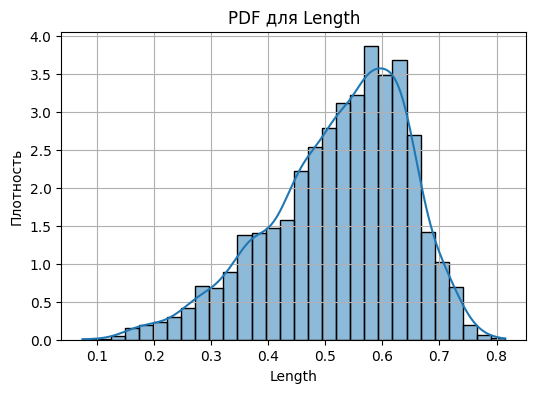

Length: p-value = 0.00000 → не нормально распределено



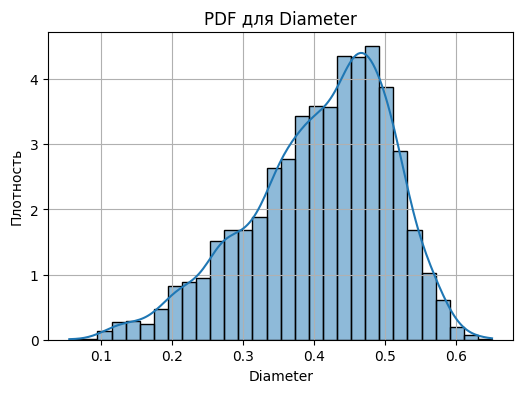

Diameter: p-value = 0.00000 → не нормально распределено



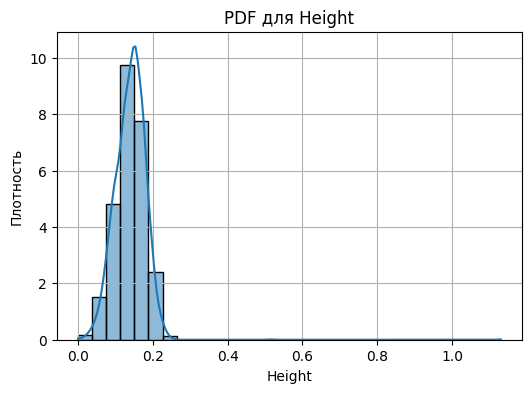

Height: p-value = 0.00000 → не нормально распределено



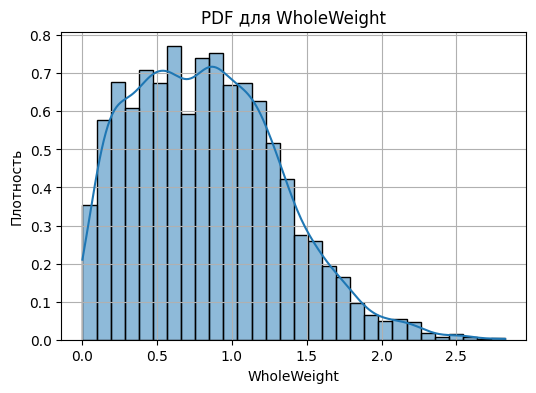

WholeWeight: p-value = 0.00000 → не нормально распределено



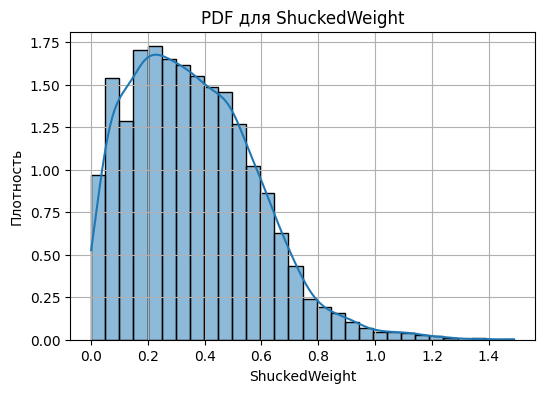

ShuckedWeight: p-value = 0.00000 → не нормально распределено



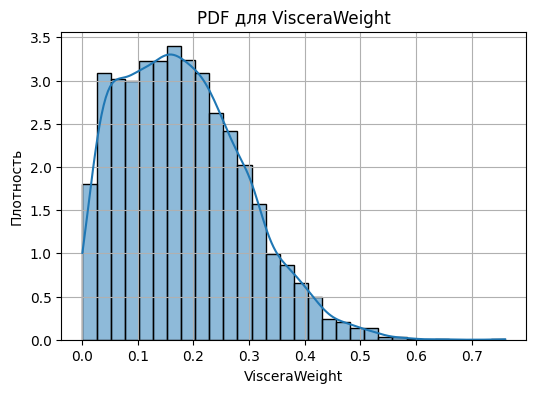

VisceraWeight: p-value = 0.00000 → не нормально распределено



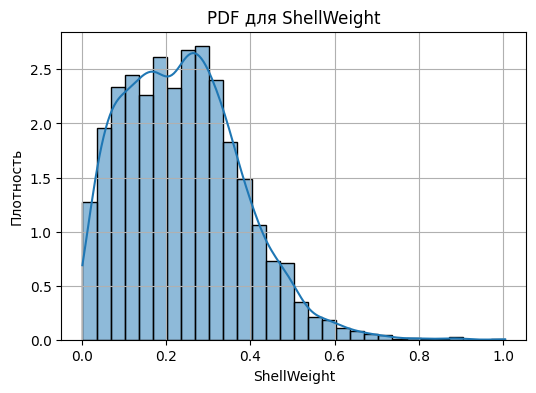

ShellWeight: p-value = 0.00000 → не нормально распределено



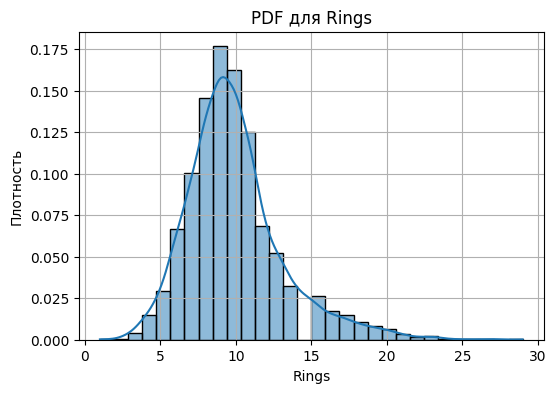

Rings: p-value = 0.00000 → не нормально распределено



In [ ]:
quantitative = df.drop(columns=['Sex'])

# Построение PDF и проверка на нормальность
for col in quantitative.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, stat="density", bins=30)
    plt.title(f'PDF для {col}')
    plt.xlabel(col)
    plt.ylabel("Плотность")
    plt.grid(True)
    plt.show()

    stat, p = stats.shapiro(df[col])
    print(f'{col}: p-value = {p:.5f} → {"нормально" if p > 0.05 else "не нормально"} распределено\n')


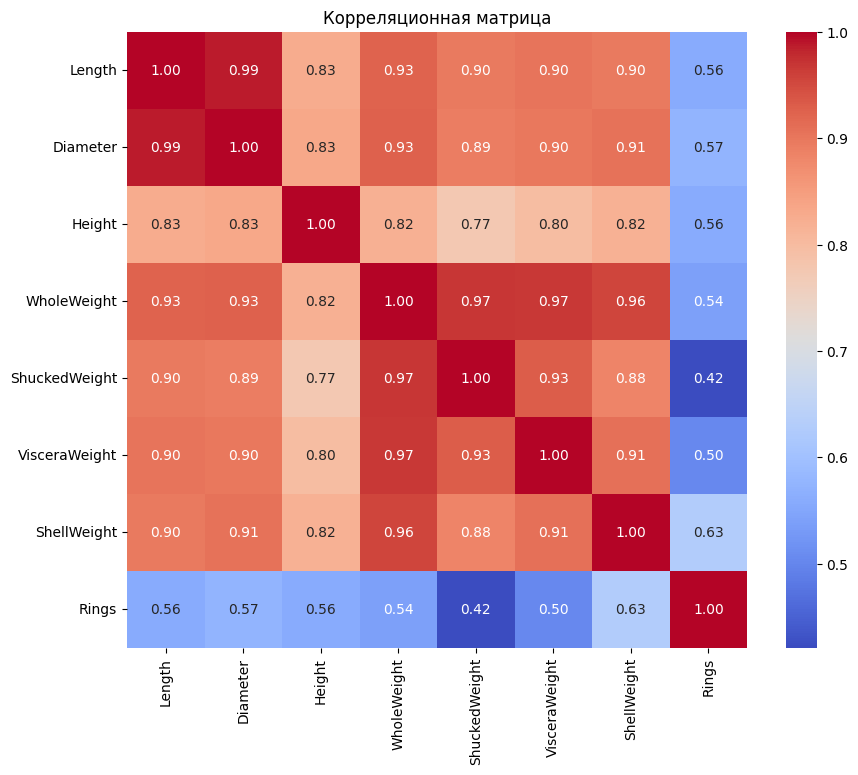

In [ ]:
corr_matrix = quantitative.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()


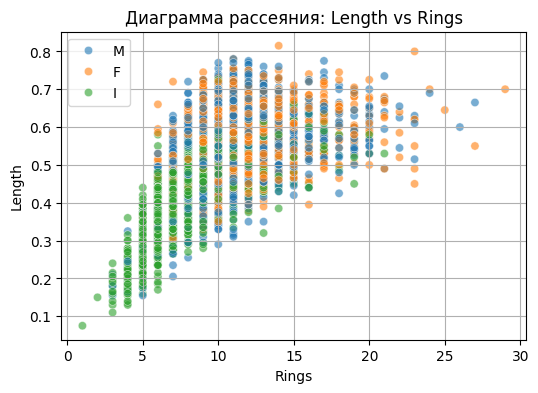

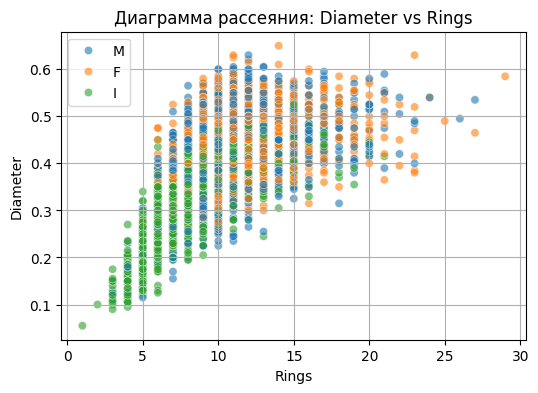

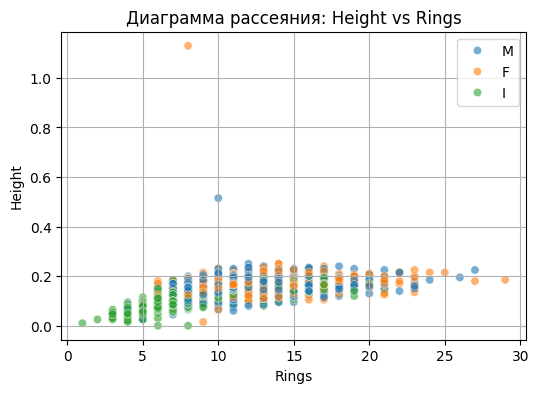

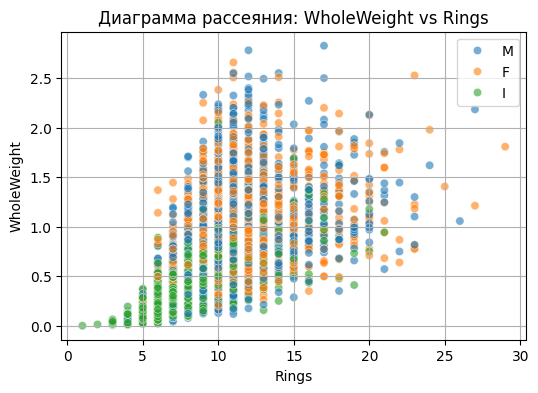

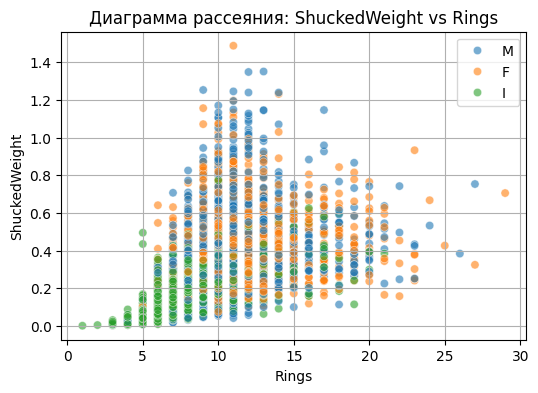

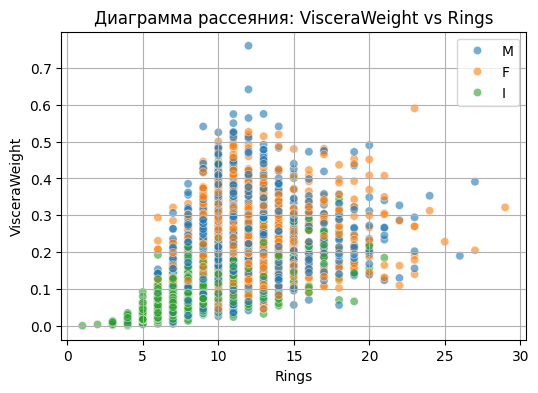

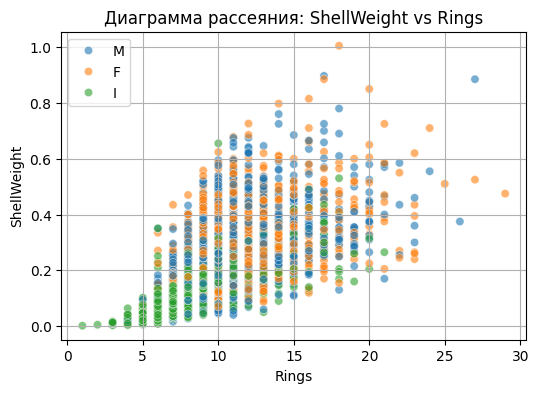

In [ ]:
for col in quantitative.columns[:-1]:  # кроме Rings
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='Rings', y=col, hue='Sex', alpha=0.6)
    plt.title(f'Диаграмма рассеяния: {col} vs Rings')
    plt.xlabel('Rings')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
print("Коэффициенты корреляции с Rings:")
for col in quantitative.columns[:-1]:
    corr, p = stats.pearsonr(df[col], df['Rings'])
    print(f"{col}: corr = {corr:.2f}, p-value = {p:.4f} → {'значимо' if p < 0.05 else 'не значимо'}")


Коэффициенты корреляции с Rings:
Length: corr = 0.56, p-value = 0.0000 → значимо
Diameter: corr = 0.57, p-value = 0.0000 → значимо
Height: corr = 0.56, p-value = 0.0000 → значимо
WholeWeight: corr = 0.54, p-value = 0.0000 → значимо
ShuckedWeight: corr = 0.42, p-value = 0.0000 → значимо
VisceraWeight: corr = 0.50, p-value = 0.0000 → значимо
ShellWeight: corr = 0.63, p-value = 0.0000 → значимо


In [ ]:
rings_m = df[df['Sex'] == 'M']['Rings']
rings_f = df[df['Sex'] == 'F']['Rings']

# Проверка на нормальность
_, p_m = stats.shapiro(rings_m)
_, p_f = stats.shapiro(rings_f)

# Проверка на равенство дисперсий
_, p_levene = stats.levene(rings_m, rings_f)

if p_m > 0.05 and p_f > 0.05 and p_levene > 0.05:
    t_stat, p_val = stats.ttest_ind(rings_m, rings_f)
    method = 't-test'
else:
    t_stat, p_val = stats.mannwhitneyu(rings_m, rings_f)
    method = 'Mann–Whitney U'

print(f"Метод: {method}")
print(f"Статистика: {t_stat:.3f}, p-value = {p_val:.4f} → {'значимо' if p_val < 0.05 else 'не значимо'}")


Метод: Mann–Whitney U
Статистика: 916347.000, p-value = 0.0001 → значимо


Length: Mann–Whitney U, p-value = 0.0000 → значимо


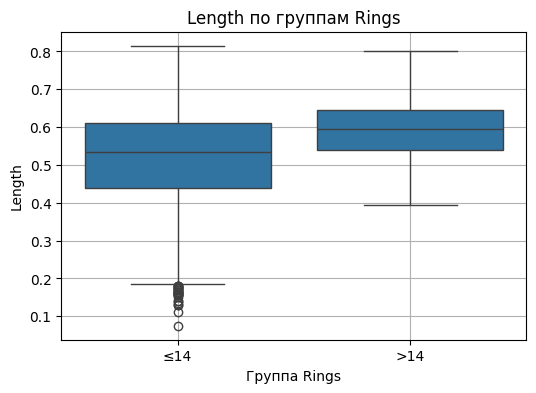

Diameter: Mann–Whitney U, p-value = 0.0000 → значимо


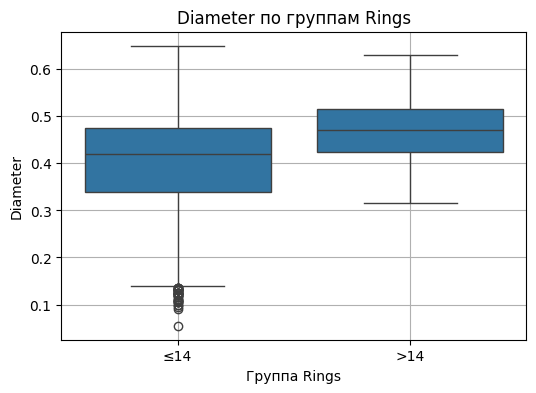

Height: Mann–Whitney U, p-value = 0.0000 → значимо


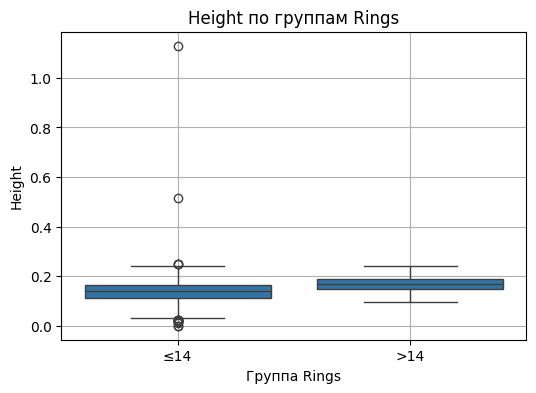

WholeWeight: Mann–Whitney U, p-value = 0.0000 → значимо


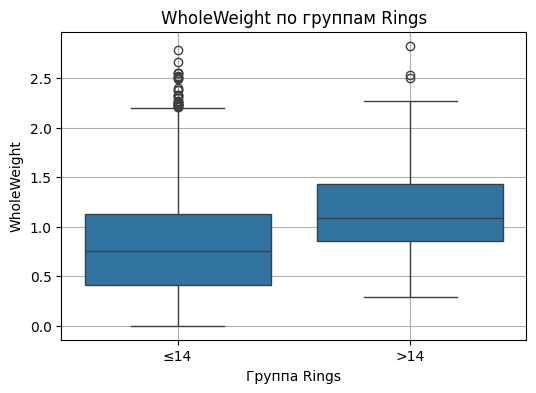

ShuckedWeight: Mann–Whitney U, p-value = 0.0000 → значимо


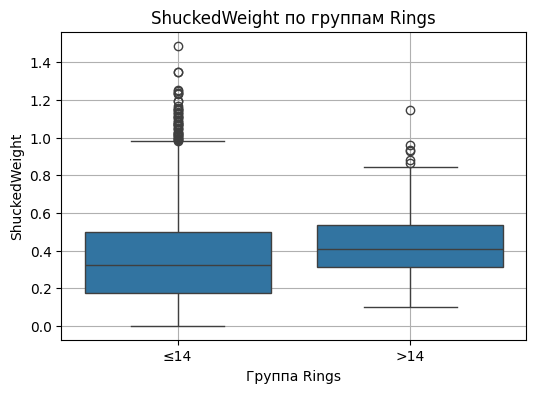

VisceraWeight: Mann–Whitney U, p-value = 0.0000 → значимо


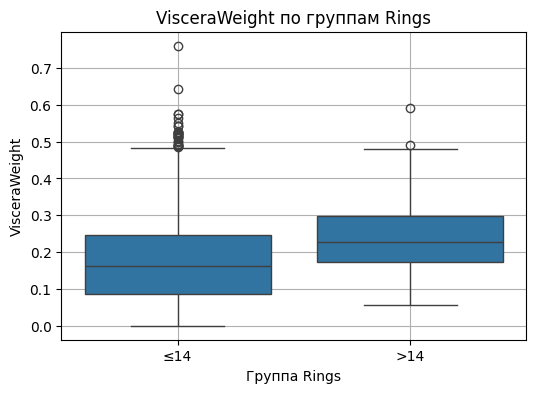

ShellWeight: Mann–Whitney U, p-value = 0.0000 → значимо


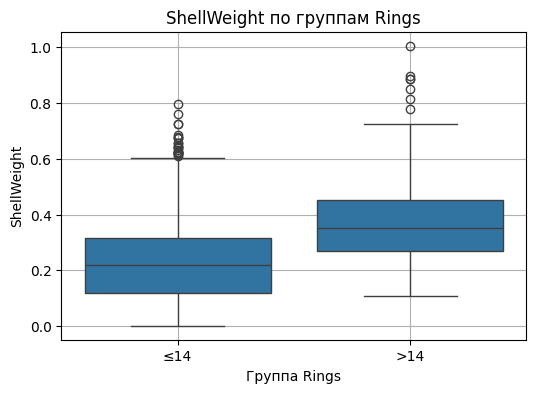

In [ ]:
df['RingsGroup'] = pd.cut(df['Rings'], bins=[-1, 14, df['Rings'].max()], labels=['≤14', '>14'])

for col in quantitative.columns[:-1]:
    group1 = df[df['RingsGroup'] == '≤14'][col]
    group2 = df[df['RingsGroup'] == '>14'][col]

    _, p1 = stats.shapiro(group1)
    _, p2 = stats.shapiro(group2)
    _, p_levene = stats.levene(group1, group2)

    if p1 > 0.05 and p2 > 0.05 and p_levene > 0.05:
        stat, p = stats.ttest_ind(group1, group2)
        test = "t-test"
    else:
        stat, p = stats.mannwhitneyu(group1, group2)
        test = "Mann–Whitney U"

    print(f"{col}: {test}, p-value = {p:.4f} → {'значимо' if p < 0.05 else 'не значимо'}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='RingsGroup', y=col, data=df)
    plt.title(f'{col} по группам Rings')
    plt.xlabel('Группа Rings')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


Length: Kruskal-Wallis, p-value = 0.0000 → значимо


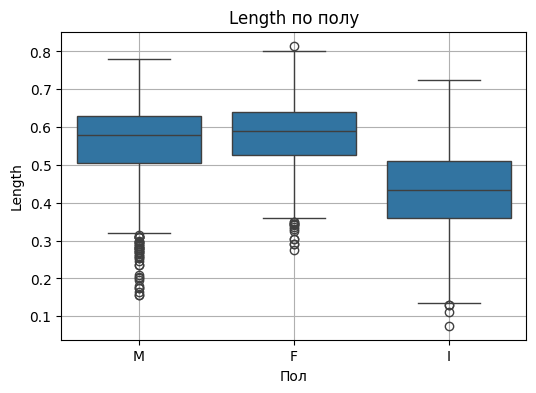

Diameter: Kruskal-Wallis, p-value = 0.0000 → значимо


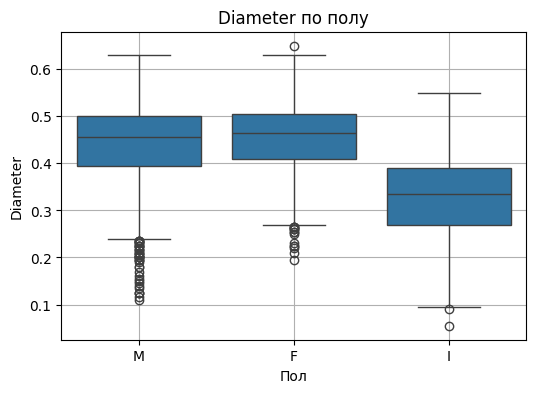

Height: Kruskal-Wallis, p-value = 0.0000 → значимо


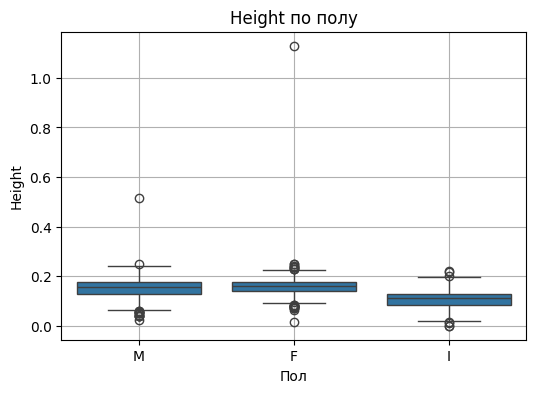

WholeWeight: Kruskal-Wallis, p-value = 0.0000 → значимо


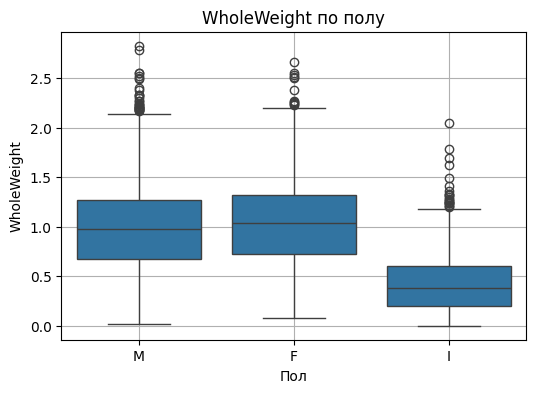

ShuckedWeight: Kruskal-Wallis, p-value = 0.0000 → значимо


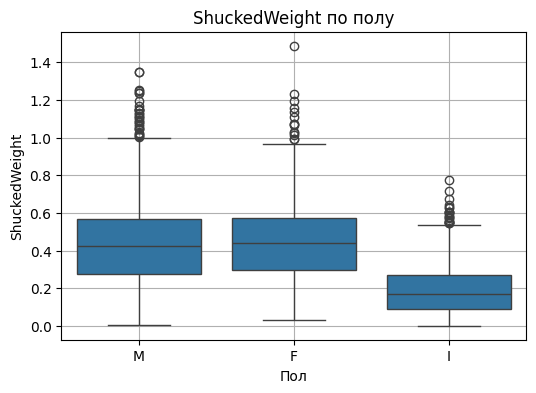

VisceraWeight: Kruskal-Wallis, p-value = 0.0000 → значимо


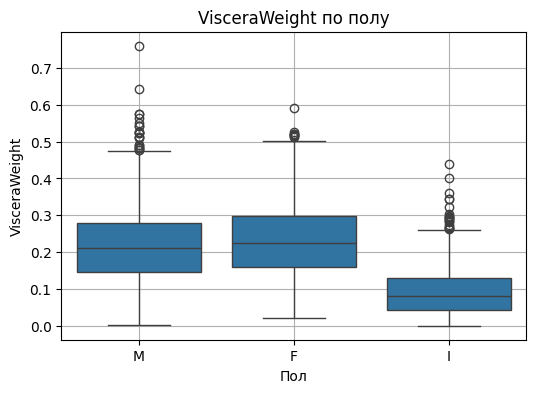

ShellWeight: Kruskal-Wallis, p-value = 0.0000 → значимо


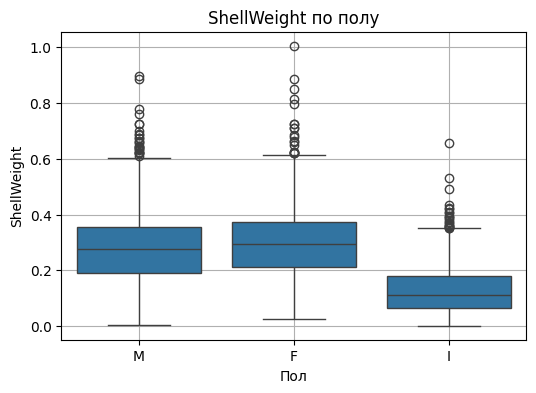

In [ ]:
for col in quantitative.columns[:-1]:
    groups = [group[col].values for name, group in df.groupby('Sex')]
    stat, p = stats.kruskal(*groups)
    print(f"{col}: Kruskal-Wallis, p-value = {p:.4f} → {'значимо' if p < 0.05 else 'не значимо'}")

    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Sex', y=col, data=df)
    plt.title(f'{col} по полу')
    plt.xlabel('Пол')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()
